In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import matplotlib as mpl


In [11]:
# import dataframe
overall_df = pd.read_csv("overall_results.csv")
ali_RMSD_mat = np.loadtxt("data/ali_RMSD_mat.txt")
ali_strc_mat = np.loadtxt("data/ali_strc_mat.txt")
seq_iden_mat = np.loadtxt("data/seq_iden_mat.txt")
overall_df.columns

Index(['index', 'species', 'name', 'EC number', 'sequence'], dtype='object')

In [12]:
overall_df

,index,species,name,EC number,sequence
0,SPC_1,Heimdallarchaeota archaeon,Asgard_Ca_Heimdallarchaeota_archaeon_B3Heim_PW...,1.2.7.11,MGTESQRYDKKLFKANLKPNWCPGCGDYGLLSASTKALSKLKFQPS...
1,SPC_2,Heimdallarchaeota archaeon,Asgard_Ca_Heimdallarchaeota_archaeon_B3Heim_PW...,1.2.1.59,MAKNMANVGVVGYGVIGKRVADAVAAQSDMKLVGVADIISDVRLRI...
2,SPC_3,Heimdallarchaeota archaeon,Asgard_Ca_Heimdallarchaeota_archaeon_B3Heim_PW...,2.7.1.40,MVTTKIVATIGPASDNILVLKDLLKYVDVCRLNFSHGAYPDHLERY...
3,SPC_4,Heimdallarchaeota archaeon,Asgard_Ca_Heimdallarchaeota_archaeon_B3Heim_PW...,5.3.1.1,MRRIVIGGNWKMQITSNNEAVRIADDIAQGLSTMSNVDVFIAPSFT...
4,SPC_5,Heimdallarchaeota archaeon,Asgard_Ca_Heimdallarchaeota_archaeon_B3Heim_PW...,4.2.1.11,MRSKFQLKVKKLHAREIFDSRGNPTVEVECHLEQGVVTRGMVPSGA...
...,...,...,...,...,...
171,SPC_172,3DAC,3DAC_137,2.7.2.3,MIAMELHKLDEVKVKGKRVLVRVDFNVPLTSDGEVADDTRINAAIP...
172,SPC_173,3DAC,3DAC_127,5.4.2.12,MSKKILFVILDGVGDRVLNGRTPLEVAVKPNMDFIAKNGVQGIVDV...
173,SPC_174,3DAC,3DAC_150,4.2.1.11,MILFKADLAIVDVRGREVIDSRGNPTVEAEVVLEDGTIGVGIVPSG...
174,SPC_175,3DAC,3DAC_101,2.7.1.40,MFGRKAKIVVTMGPALETEEKIKEAILAGADAFRLNFSHGSHEEHY...


In [13]:
# Seaborn to draw structure RMSD map
EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    index_list = overall_df[overall_df["EC number"] == EC_number].index
    
    sns.clustermap(ali_RMSD_mat[index_list][:,index_list],
                   method="average",
                   vmin=0,
                   vmax=5,
                   xticklabels=overall_df["species"][index_list],
                   yticklabels=overall_df["species"][index_list],
                   row_linkage=linkage(ali_RMSD_mat[index_list][:,index_list],"average"),
                   col_linkage=linkage(ali_RMSD_mat[index_list][:,index_list],"average"),
                   cbar_pos=None,
                   cmap="viridis")
    
    plt.savefig("Figure/RMSD_%s.png"%EC_number)
    plt.close()


C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]
C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [14]:
# seaborn for sequences
EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    index_list = overall_df[overall_df["EC number"] == EC_number].index
    
    sns.clustermap(seq_iden_mat[index_list][:,index_list],
                   method="average",
                   vmin=0.25,
                   vmax=0.5,
                   xticklabels=overall_df["species"][index_list],
                   yticklabels=overall_df["species"][index_list],
                   row_linkage=linkage(seq_iden_mat[index_list][:,index_list],"average"),
                   col_linkage=linkage(seq_iden_mat[index_list][:,index_list],"average"),
                   cbar_pos=None,
                   cmap="plasma_r")
    
    plt.savefig("Figure/SEQ_%s.png"%EC_number)
    plt.close()


In [15]:
# with ticks


EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    index_list = overall_df[overall_df["EC number"] == EC_number].index
    Z = linkage(ali_RMSD_mat[index_list][:,index_list],"average")
    dn = dendrogram(Z)
    new_index_list = [index_list[int(i)] for i in dn["ivl"]]
    plt.close()

    plt.figure(figsize=(12,12))
    ax = plt.subplot()
    plt.imshow(ali_RMSD_mat[new_index_list][:,new_index_list],vmin=0,vmax=5,cmap="viridis")
    plt.xticks(np.arange(0,len(new_index_list),1),overall_df["species"][new_index_list],rotation=90,fontsize=14)
    plt.yticks(np.arange(0,len(new_index_list),1),overall_df["species"][new_index_list],fontsize=14)
    ax.yaxis.set_ticks_position('right')
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    plt.tight_layout()
    plt.savefig("Figure/new_RMSD_%s.png"%EC_number)
    plt.close()

    plt.figure(figsize=(12,12))
    ax = plt.subplot()
    plt.imshow(seq_iden_mat[new_index_list][:,new_index_list],vmin=0.25,vmax=0.5,cmap="plasma_r")
    plt.xticks(np.arange(0,len(new_index_list),1),overall_df["species"][new_index_list],rotation=90,fontsize=14)
    plt.yticks(np.arange(0,len(new_index_list),1),overall_df["species"][new_index_list],fontsize=14)
    ax.yaxis.set_ticks_position('right')
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    plt.tight_layout()
    plt.savefig("Figure/new_SEQ_%s.png"%EC_number)
    plt.close()





C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [16]:
# No ticks

EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    index_list = overall_df[overall_df["EC number"] == EC_number].index
    Z = linkage(ali_RMSD_mat[index_list][:,index_list],"average")
    dn = dendrogram(Z)
    new_index_list = [index_list[int(i)] for i in dn["ivl"]]
    plt.close()

    plt.figure(figsize=(8,8))
    plt.imshow(ali_RMSD_mat[new_index_list][:,new_index_list],vmin=0,vmax=5,cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig("no_ticks_figure/no_legend_RMSD_%s.png"%EC_number)
    plt.close()

    plt.figure(figsize=(8,8))
    plt.imshow(seq_iden_mat[new_index_list][:,new_index_list],vmin=0.25,vmax=0.6,cmap="plasma_r")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig("no_ticks_figure/no_legend_SEQ_%s.png"%EC_number)
    plt.close()





C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


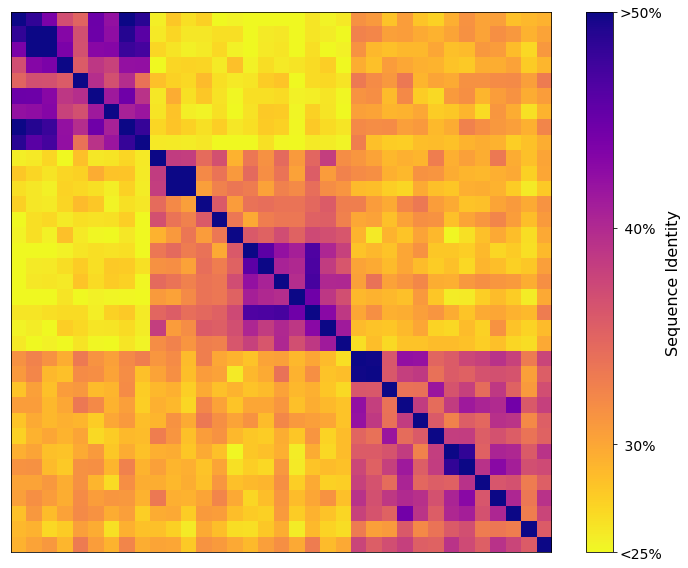

In [17]:
EC_number = "1.2.7.11"

index_list = overall_df[overall_df["EC number"] == EC_number].index
Z = linkage(ali_RMSD_mat[index_list][:,index_list],"average")
dn = dendrogram(Z)
new_index_list = [index_list[int(i)] for i in dn["ivl"]]
plt.close()

plt.figure(figsize=(10,8))
plt.imshow(ali_RMSD_mat[new_index_list][:,new_index_list],vmin=0,vmax=5,cmap="viridis")
plt.xticks([])
plt.yticks([])


cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_yticklabels([0., 1., 2., 3., 4., 5.],fontsize=14)  # horizontal colorbar
cbar.ax.set_ylabel("Structure RMSD (Å)",fontsize=16)

plt.tight_layout()
plt.savefig("no_ticks_figure/no_legend_RMSD_%s_colorbar.png"%EC_number)
plt.close()

plt.figure(figsize=(10,8))
plt.subplot()
plt.imshow(seq_iden_mat[new_index_list][:,new_index_list],vmin=0.25,vmax=0.5,cmap="plasma_r")
plt.xticks([])
plt.yticks([])

cbar = plt.colorbar(ticks=[0.25, 0.3, 0.4, 0.5])
cbar.ax.set_yticklabels(["<25%"," 30%"," 40%", '>50%'],fontsize=14)  # horizontal colorbar
cbar.ax.set_ylabel("Sequence Identity",fontsize=16)

plt.tight_layout()
plt.savefig("no_ticks_figure/no_legend_SEQ_%s_colorbar.png"%EC_number)





C:\Users\85404\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


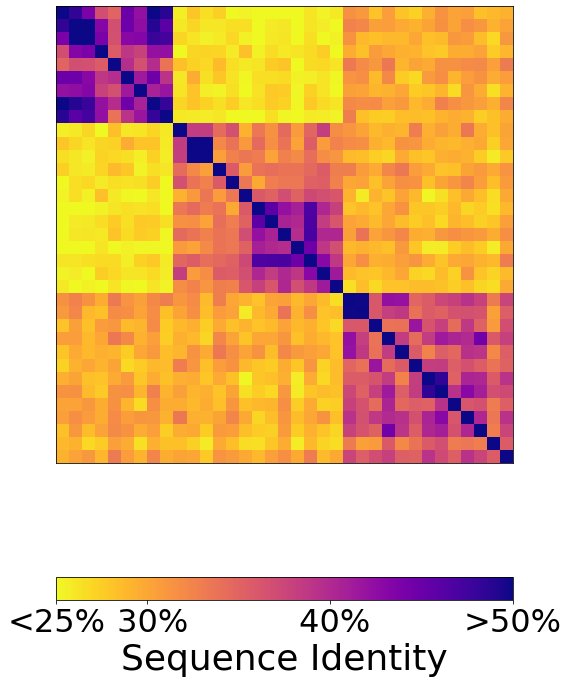

In [18]:
EC_number = "1.2.7.11"

index_list = overall_df[overall_df["EC number"] == EC_number].index
Z = linkage(ali_RMSD_mat[index_list][:,index_list],"average")
dn = dendrogram(Z)
new_index_list = [index_list[int(i)] for i in dn["ivl"]]
plt.close()

plt.figure(figsize=(8,11))
plt.imshow(ali_RMSD_mat[new_index_list][:,new_index_list],vmin=0,vmax=5,cmap="viridis")
plt.xticks([])
plt.yticks([])


cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4, 5],orientation="horizontal")
cbar.ax.set_xticklabels([0., 1., 2., 3., 4., 5.],fontsize=32)  # horizontal colorbar
cbar.ax.set_xlabel("Structure RMSD (Å)",fontsize=36)

plt.tight_layout()
plt.savefig("no_ticks_figure/no_legend_RMSD_%s_colorbar_horizon.png"%EC_number)
plt.close()

plt.figure(figsize=(8,11))
plt.subplot()
plt.imshow(seq_iden_mat[new_index_list][:,new_index_list],vmin=0.25,vmax=0.5,cmap="plasma_r")
plt.xticks([])
plt.yticks([])

cbar = plt.colorbar(ticks=[0.25, 0.3, 0.4, 0.5],orientation="horizontal")
cbar.ax.set_xticklabels(["<25%"," 30%"," 40%", '>50%'],fontsize=32)  # horizontal colorbar
cbar.ax.set_xlabel("Sequence Identity",fontsize=36)

plt.tight_layout()
plt.savefig("no_ticks_figure/no_legend_SEQ_%s_colorbar_horizon.png"%EC_number)



